In [ ]:
#|default_exp utils
#|hide
from tglcourse.utils import *

# Lesson 1: PyTorch Basics

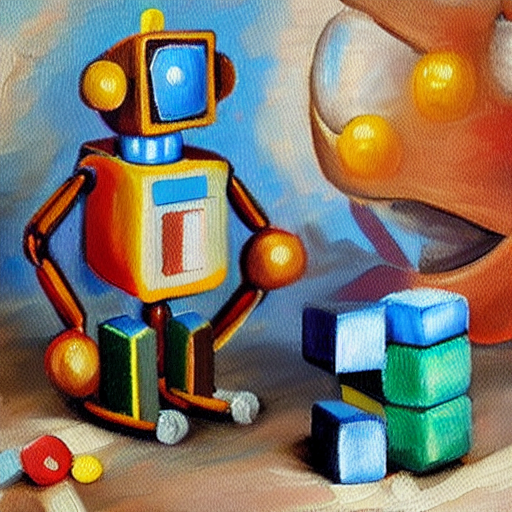

In [ ]:
#| echo: false
load_image_pil('images/An_oil_painting_of_a_cute_baby_robot_playing_with_toy_blocks.png')


VIDEO: Introducing PyTorch, Tensors, GPU operations

If you've never used pytorch...

In [ ]:
#|export
import torch
import torchvision
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

![PyTorch Logo](https://miro.medium.com/max/805/1*nyULxATmIItCJC90uep1ig.png)

PyTorch is primarily a deep learning framework. It has been designed to make creating and working with deep neural networks as easy, fast and flexible as possible. Today we'll look at one of the core components that makes this possible: tensors. We'll start by looking at how to contruct and manipulate tensors, and then apply some of these ideas by representing images as tensors and seeing what we can do with that.

## Creating Tensors

We can construct a tensor directly from some common python iterables, such as list and tuple. Nested iterables can also be handled as long as the dimensions make sense.

In [ ]:
# tensor from a list
a = torch.tensor([0, 1, 2])
print(f"Tensor a: {a}")

#tensor from a tuple of tuples
b = ((1.0, 1.1), (1.2, 1.3))
b = torch.tensor(b)
print(f"Tensor b: {b}")

# tensor from a numpy array
c = np.ones([2, 3])
c = torch.tensor(c)
print(f"Tensor c: {c}")

Tensor a: tensor([0, 1, 2])
Tensor b: tensor([[1.0000, 1.1000],
        [1.2000, 1.3000]])
Tensor c: tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


It's easy to get confused as to what 'shape' a tensor has. So debugging tip #1: when in doubt, print out the shape!

In [ ]:
print(b.shape)

torch.Size([2, 2])


There are also various constructor methods you can use. The arguments determine the size - explore changing these are see what happens to the output:

In [ ]:
x = torch.ones(5, 3)
y = torch.zeros(2)
z = torch.empty(1, 1, 5)
print(f"Tensor x: {x}")
print(f"Tensor y: {y}")
print(f"Tensor z: {z}")

Tensor x: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Tensor y: tensor([0., 0.])
Tensor z: tensor([[[ 2.3328e-35,  0.0000e+00,  1.6174e-35,  0.0000e+00, -2.1574e+01]]])


Notice that `.empty()` does not return zeros, but seemingly random small numbers. Unlike `.zeros()`, which initialises the elements of the tensor with zeros, `.empty()` just allocates the memory. It is hence a bit faster if you are looking to just create a tensor.

There are also constructors for random numbers:

In [ ]:
# uniform distribution
a = torch.rand(1, 3)

# normal distribution
b = torch.randn(3, 4)

print(f"Tensor a: {a}")
print(f"Tensor b: {b}")

Tensor a: tensor([[0.7570, 0.4441, 0.8058]])
Tensor b: tensor([[-0.9783, -1.0734,  0.5442,  1.5052],
        [ 0.4123,  0.4849,  0.7075,  0.5175],
        [-0.4181,  0.3573, -0.8725, -0.2095]])


**THINK**: What's the difference? If you're curious, use `plt.hist(torch.randn(100))` to view the distribution.

There are also constructors that allow us to construct a tensor according to the above constructors, but with dimensions equal to another tensor:

In [ ]:
c = torch.zeros_like(a)
d = torch.rand_like(c)
print(f"Tensor c: {c}")
print(f"Tensor d: {d}")

Tensor c: tensor([[0., 0., 0.]])
Tensor d: tensor([[0.3490, 0.9085, 0.9652]])


Finally,  `.arange()` and `.linspace()` behave how you would expect them to if you are familar with numpy.

In [ ]:
a = torch.arange(0, 10, step=1) # Equivalent to np.arange(0, 10, step=1)
b = torch.linspace(0, 5, steps=11) # np.linspace(0, 5, num=11)

print(f"Tensor a: {a}\n")
print(f"Tensor b: {b}\n")

Tensor a: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Tensor b: tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000,
        4.5000, 5.0000])



## Tensor Operations


We can perform operations on tensors using methods under `torch.`. However, in PyTorch most common Python operators are overridden, so we can use those instead. The common standard arithmetic operators (+, -, *, /, and **) have all been lifted to elementwise operations.

In [ ]:
x = torch.tensor([1, 2, 4, 8])
y = torch.tensor([1, 2, 3, 4])
print('Addition via torch.add:', torch.add(x, y))
print('Addition using "+":', x+y) # The same
print('Some other operations:')
x + y, x - y, x * y, x / y, x**y  # The ** operator is exponentiation

Addition via torch.add: tensor([ 2,  4,  7, 12])
Addition using "+": tensor([ 2,  4,  7, 12])
Some other operations:


(tensor([ 2,  4,  7, 12]),
 tensor([0, 0, 1, 4]),
 tensor([ 1,  4, 12, 32]),
 tensor([1.0000, 1.0000, 1.3333, 2.0000]),
 tensor([   1,    4,   64, 4096]))

**THINK**: What does 'element-wise' mean? Inspect the outputs above.

Tensors also have many built-in methods such as `.mean()` or `.sum()` (see the full list here: https://pytorch.org/docs/stable/tensors.html). Whenever you're working with a multi-dimensional tensor, pay attention to the dimensions and think about what result you're aiming to achieve.

In [ ]:
x = torch.rand(3, 3)
print('x:\n', x)
print(f"Sum of every element of x: {x.sum()}")
print(f"Sum of the columns of x: {x.sum(axis=0)}")
print(f"Sum of the rows of x: {x.sum(axis=1)}")

x:
 tensor([[0.2999, 0.8812, 0.4049],
        [0.0143, 0.8986, 0.9411],
        [0.6498, 0.0459, 0.8872]])
Sum of every element of x: 5.022925853729248
Sum of the columns of x: tensor([0.9640, 1.8257, 2.2332])
Sum of the rows of x: tensor([1.5860, 1.8540, 1.5829])


Remember we said most operations default to 'element-wise'? What if we want the matrix operation? Torch has you covered there as well. `torch.matmul()` or the `@` symbol let you do matrix multiplication. For dot multiplication, you can use torch.dot(). 

Transposes of 2D tensors are obtained using `torch.t()` or `Tensor.T`. Note the lack of brackets for `Tensor.T` - it is an attribute, not a method.

In [ ]:
a = torch.rand(2, 3)
b = a.T
print('a.shape:', a.shape, 'b.shape:', b.shape)
print(a@b) # Matrix multiplication of a 2x3 with a 3x2 matrix gives a 2x2 result.

a.shape: torch.Size([2, 3]) b.shape: torch.Size([3, 2])
tensor([[0.5967, 0.4257],
        [0.4257, 1.1436]])


## Manipulating Tensors

Beyond mathematical operations, we often want to access specific items or sets if items in a tensor, or perform operations like changing the shape of a tensor. Here are a few examples of some common tasks. These may feel simple if you're used to something like numpy, but it's worth making sure you know how to do these basic operations (or at least, you know where to find these examples again to refer to them!) since we'll use these a lot in the coming lessons. 

In [ ]:
# Indexing tensors
x = torch.arange(0, 10)
print(x)
print(x[-1])
print(x[1:3]) # From index 1 up to but NOT INCLUDING index 3
print(x[:-2])

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor(9)
tensor([1, 2])
tensor([0, 1, 2, 3, 4, 5, 6, 7])


Reshaping works as long as the shapes make sense. (3, 4) -> (4, 3) is fine, but (3, 4) -> (8, 2) won't work since there aren't enough elements!

In [ ]:
# TODO rework example

# Reshaping
z = torch.arange(12).reshape(6, 2)
print(f"Original z (6, 2) : \n {z}")

# 2D -> 1D
z = z.flatten()
print(f"Flattened z: \n {z}")

# and back to 2D
z = z.reshape(3, 4)
print(f"Reshaped (3x4) z: \n {z}")

Original z (6, 2) : 
 tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])
Flattened z: 
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Reshaped (3x4) z: 
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


Concatenating tensors is done with torch.cat - take a look at this examples and take note of how the dimension specified affects the output:

In [ ]:
# Create two tensors of the same shape
x = torch.arange(12, dtype=torch.float32).reshape((3, 4))
y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])


#concatenate them along rows
cat_rows = torch.cat((x, y), dim=0)

# concatenate along columns
cat_cols = torch.cat((x, y), dim=1)

# printing outputs
print('Concatenated by rows: shape{} \n {}'.format(list(cat_rows.shape), cat_rows))
print('\n Concatenated by colums: shape{}  \n {}'.format(list(cat_cols.shape), cat_cols))

Concatenated by rows: shape[6, 4] 
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])

 Concatenated by colums: shape[3, 8]  
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])


## Squeezing Tensors

When processing batches of data, you will quite often be left with singleton dimensions. e.g. [1,10] or [256, 1, 3]. This dimension can quite easily mess up your matrix operations if you don’t plan on it being there…

In order to compress tensors along their singleton dimensions we can use the .`squeeze()` method. We can use the `.unsqueeze()` method to do the opposite.

In [ ]:
x = torch.randn(1, 10)
print(x.shape)
print(f"x[0]: {x[0]}") # printing the zeroth element of the tensor will not give us the first number!

torch.Size([1, 10])
x[0]: tensor([ 0.2087,  0.2851, -0.8465,  1.0927, -0.7520, -1.1400, -0.1221, -1.2466,
         0.0571,  1.3664])


In [ ]:
# lets get rid of that singleton dimension and see what happens now
x = x.squeeze(0)
print(x.shape)
print(f"x[0]: {x[0]}")

torch.Size([10])
x[0]: 0.20874953269958496


In [ ]:
y = torch.randn(5, 5)
print(f"shape of y: {y.shape}")

# lets insert a singleton dimension
y = y.unsqueeze(1) # Note the argument here is 1 - try 0 and 2 and make sure you get a feel for what unsqueeze does. 
print(f"shape of y: {y.shape}")

shape of y: torch.Size([5, 5])
shape of y: torch.Size([5, 1, 5])


## Images as Tensors

Video: How are images represented? Images as tensors? Demo exercise.

TODO explanation

### Images as arrays of numbers

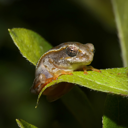

In [ ]:
im = Image.open('images/frog.png').convert('RGB').resize((128, 128))
im

In [ ]:
np.array(im).shape # Remove .convert('RGB') in the cell above and see how this changes

(128, 128, 3)

We'll want to do this a bunch during the course, so let's create a function to load an image using PIL and export it so that we can later access it in other notebooks:

In [ ]:
#|export
def load_image_pil(fn, size=None):
    im = Image.open(fn).convert('RGB')
    if size != None:
        im = im.resize(size)
    return im

And to test that it works:

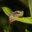

In [ ]:
load_image_pil('images/frog.png', size=(32, 32))

It will probably come in handy to be able to load images from a url, so let's export a function for that too:

In [ ]:
#|export
import requests
from io import BytesIO

def pil_from_url(url, size=None):
    response = requests.get(url)
    im = Image.open(BytesIO(response.content)).convert('RGB')
    if size != None:
        im = im.resize(size)
    return im

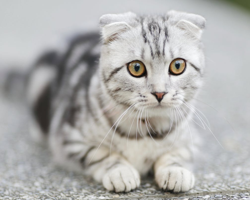

In [ ]:
pil_from_url("https://images.pexels.com/photos/156934/pexels-photo-156934.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1", size=(250, 200))

### Converting to Tensors

Mention torchvision.transforms.ToTensor()?

In [ ]:
tensor_im = torch.tensor(np.array(im)).permute(2, 0, 1)/255.0
tensor_im.shape

torch.Size([3, 128, 128])

TODO Explain order

In [ ]:
#|export
def pil_to_tensor(im):
    # TODO split into multiple lines and explain
    return torch.tensor(np.array(im)).permute(2, 0, 1).unsqueeze(0)/255.0

def tensor_to_pil(tensor_im):
    tensor_im = tensor_im.squeeze() # In case there is a batch dimension
    tensor_im = tensor_im.detach().cpu() # Detach from computational graph - explained in next lesson!
    tensor_im = tensor_im.permute(1, 2, 0) # Rearrange the channels
    tensor_im = tensor_im.clip(0, 1)*255 # Note that we clip to (0, 1) before scaling to (0, 255)
    im_array = np.array(tensor_im).astype(np.uint8) # Convert to int as required by PIL
    im = Image.fromarray(im_array) # Convert to PIL image
    return im

TODO docstrings, load_image_as_tensor

In [ ]:
# TODO Show cropping, accessing a specific channel, converting to BW and back

# SHow plt.imshow?

torch.Size([1, 3, 128, 128])
<class 'PIL.Image.Image'>


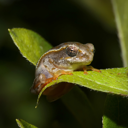

In [ ]:
im = load_image_pil('images/frog.png', size=(128, 128))
tensor_im = pil_to_tensor(im)
print(tensor_im.shape)
im_out = tensor_to_pil(tensor_im)
print(type(im_out))
im_out

### Transforms

In [ ]:
# TODO examples

### Exercise: Least Average Image
Given a set of images, for each pixel find the furthest from the mean.
Result: a pretty cool looking image with textures etc from the different inputs

Code hints and solution hidden \.

In [ ]:
# TODO introduce torchvision here maybe?

Page stats: Total Hits: [![HitCount](https://hits.dwyl.com/johnowhitaker/tglcourse.svg?style=flat-square&show=unique)](http://hits.dwyl.com/johnowhitaker/tglcourse)
Page visitors:
![visitor badge](https://page-views.glitch.me/badge?page_id=tglcourse.l01)